# 1. Importing Libraries

In [1]:
#!/usr/bin/env python3
#-*- coding:utf-8 -*-

#for array calcutions
import numpy as np
import pandas as pd
#for serialising and loading the model
import pickle 
#for convering corpus into frequency matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 
#for perfomance measure
from sklearn.metrics import confusion_matrix, accuracy_score

sns.set_style('darkgrid')

# 2. Data Extraction and Processing

- Task 1: Load a raw Fastq file, and generate a processed file and split that file into k-mers.
- Task 2: Percy applies bio-processing techniques on the dataset.

# 3. Biological Data - Example

In [2]:
#define the synthetic data with labels  

sequences = [
    "atg cgt tac caa gtc agg tct gtg aac tag",
    "ggc ttt agg cca act gtc tac gat cac acg",
    "ttc agg tag tct atc gcg gta gac tgt tac",
    "act gga tga cta tcg cgt aca tca gta gag",
    "tta gct atc agt agc ttg tgt tct cca atc",
    "gtc cga gac tgc ctc aag ctt gat tac atg",
    "cat gct aac tac gta cga tgc ctc acg tgg",
    "tac gat cgt acg tgc cta act gga tct atg",
    "gga tct gct tct cga tgt tac atg gca cgt",
    "ttg cgt tac aca gga cgt ttc tct atg gct",
    "cga tct gct tac gct tac aca gga tgc tct",
    "tac gga cgt ttc tct atg gct cga tct gct",
    "tac gct tac aca gga tgc tct tac gga cgt",
    "ttc tct atg gct cga tct gct tac gct tac",
    "aca gga tgc tct tac gga cgt ttc tct atg",
]

labels = [2, 1, 4, 0, 3, 1, 2, 4, 0, 3, 1, 2, 4, 0, 3]


In [3]:
data = pd.read_csv('protein_sequences.csv')

In [5]:
data

,Protein Sequence,Label
0,HYRMIHWMMEIDCNGCANNTLSRRWNYDFWHKHVEQVKCYRHNIRD...,ligases
1,DNIDADFRQDAFQHKRRLPWHTYEFHPRMEPHWCLPGNNYMHAAYP...,ligases
2,DWYHYKAIHVIAMVLDHSSYTCASNFFKKDWSSDYAYMTIEGIYDS...,ligases
3,LDIQVRCLCTIAKMSHLDVPHEPYAIQSQNWRCCWTYLGRMFAINN...,ligases
4,YLWAFPESSCTYNVDAAWMFNDAAILMNPNQCWVDTILCWKHEVPM...,ligases
...,...,...
995,VIYHLARLDKPGWCNMPDTKRREQQQVDGIWCFKMSYCHFAEKRVL...,oxidoreductase
996,ETYASMMTESNFPPDKVVRRHKSCYPEQKQMYPTFEPNDETVRHKQ...,oxidoreductase
997,MYGNPHKDDSVPKGRKVYPAGWANSEELQYVDGVKPWLSWGCSYQA...,oxidoreductase
998,HKTWPEKMPSLEDHNVFTFYNSSHYPFWYSLNGWCIYKDHDMNPEC...,oxidoreductase


In [7]:
data['Protein Sequence'] = data['Protein Sequence'].str.lower().apply(lambda x: [x[i:i+3] for i in range(0, len(x), 3)])

In [8]:
data.Label.unique()

array(['ligases', 'lyases', 'hydrolases', 'isomerase', 'translocase',
       'transferases', 'non enzyme', 'oxidoreductase'], dtype=object)

In [9]:
# Create a mapping of unique labels to numerical values
label_mapping = {label: i for i, label in enumerate(data['Label'].unique())}

# Replace the labels in the DataFrame with numerical values
data['Label'] = data['Label'].replace(label_mapping)

In [11]:
sequences = data['Protein Sequence'].to_list()
labels = data['Label'].to_list()

In [12]:
def tokenize(x):
    return x.split()

# 4. Create a Confusion Matrix

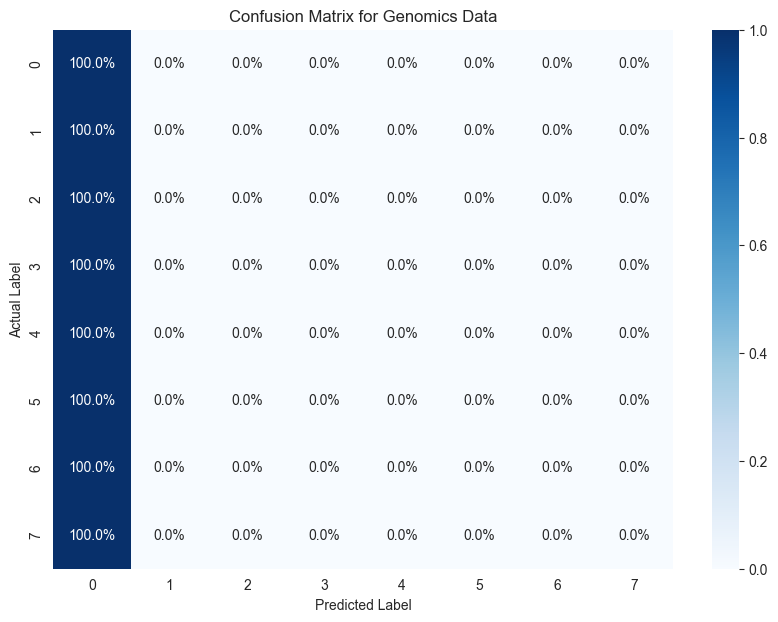

In [14]:
#Load the model from pickle file
with open('model_bio.pkl', 'rb') as f:
    model = pickle.load(f)
    
#load vectorizer (from training vocab)
with open('vectorizer_bio.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

    
# Assuming 'X_test' is a list of lists containing split protein sequences
# Convert each sublist back to a single string
X_test_concatenated = [''.join(sequence) for sequence in X_test]

# Transform the concatenated sequences using the vectorizer
X_test_t = vectorizer.transform(X_test_concatenated)

# Performing prediction on test data (after tf-idf transformation)
y_pred = model.predict(X_test_t)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')

# Visualizing the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='.1%', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Genomics Data')
plt.show()

Per Class Accuracy:
 [100.   0.   0.   0.   0.   0.   0.   0.]


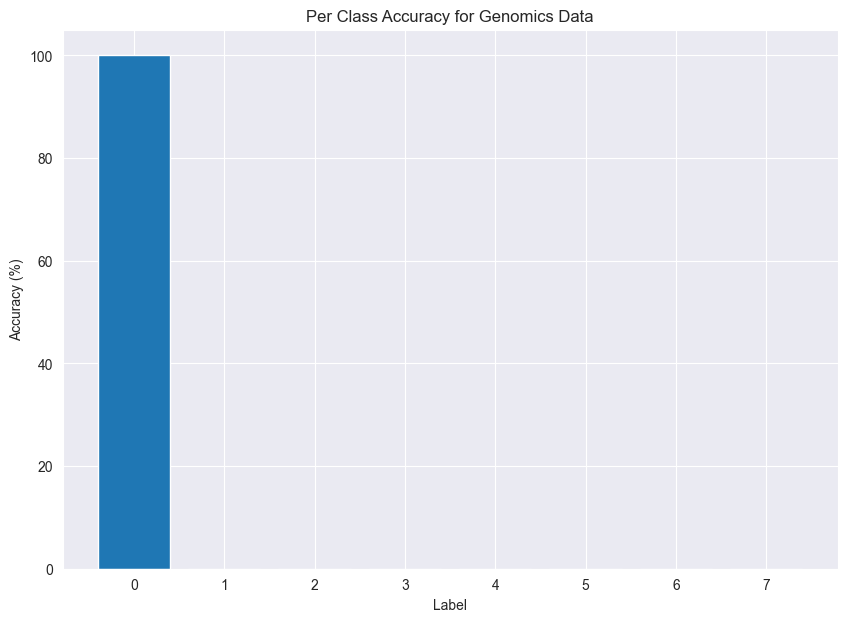

In [15]:
# Compute per class accuracy
class_accuracy = 100.0*conf_mat.diagonal()/conf_mat.sum(axis=1)
print("Per Class Accuracy:\n", class_accuracy)


# Visualizing the per class accuracy
plt.figure(figsize=(10,7))
plt.bar(range(len(class_accuracy)), class_accuracy)
plt.xlabel('Label')
plt.ylabel('Accuracy (%)')
plt.title('Per Class Accuracy for Genomics Data')
plt.show()


In [16]:

#overall/global accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy: {}%".format(np.round(overall_accuracy*100,1)))


Overall Accuracy: 10.0%
